In [71]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (16.0, 8.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [72]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial. 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

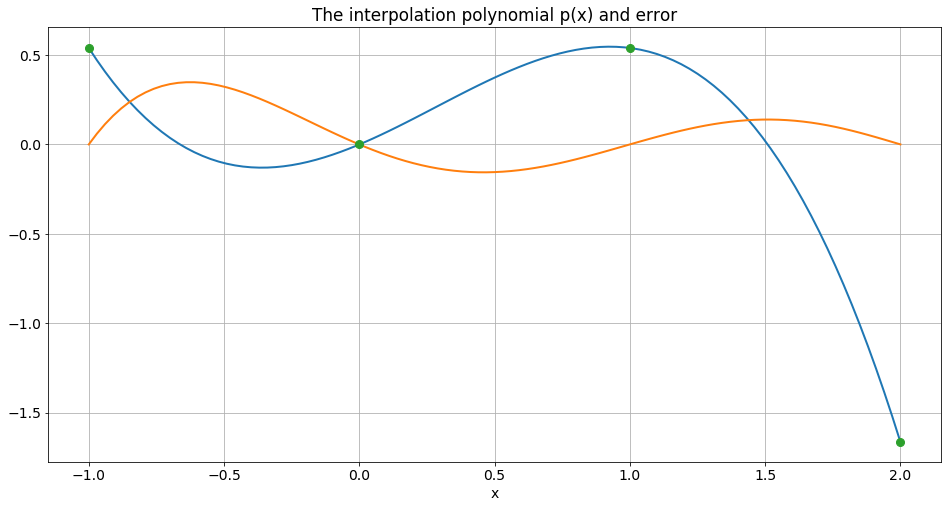

In [73]:
# Confirmation of task1 equal distribution
xdata = [-1,0,1,2]           # The interpolation points
ydata = [0.540,0,0.540,-1.665]
x = linspace(-1, 2, 101)     # The x-values in which the polynomial is evaluated
p = -0.6375*x**3+0.54*x**2+0.6375*x
f= x**2*cos(x)
plot(x, p)                  # Plot the polynomial
plot(x,(f-p))
plot(xdata, ydata, 'o')     # Plot the interpolation points 
title('The interpolation polynomial p(x) and error')
xlabel('x');

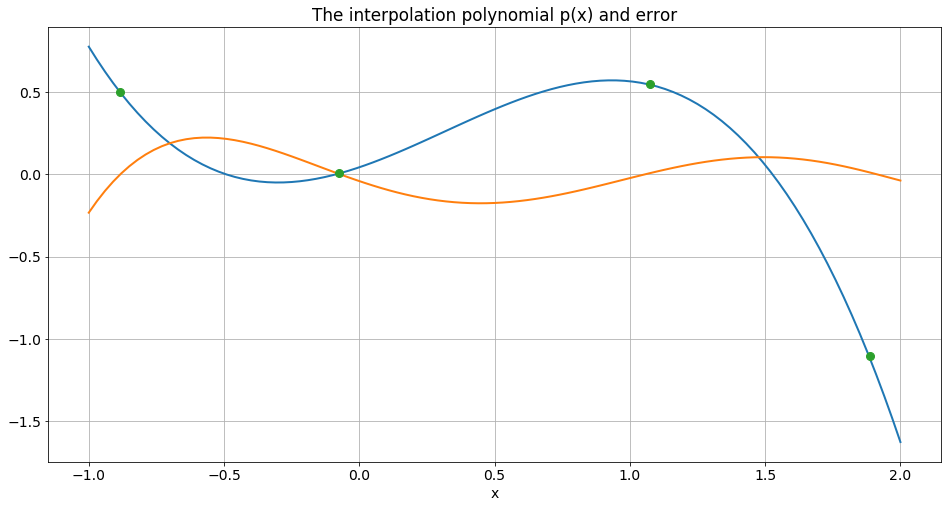

In [74]:
# Confirmation of task1 Chebyshev distribution
xdata = [1.886,1.074,-0.074,-0.886]           # The interpolation points
ydata = [-1.103,0.55,0.005,0.497]
x = linspace(-1, 2, 101)     # The x-values in which the polynomial is evaluated
p = -0.661*x**3+0.627*x**2+0.556*x+0.042     # Compute the polynomial evaluated in x
f= (x**2)*cos(x)
plot(x, p)                  # Plot the polynomial
plot(x,(f-p))
plot(xdata, ydata, 'o')     # Plot the interpolation points 
title('The interpolation polynomial p(x) and error')
xlabel('x');

In [94]:
def equal(a,b,n):
    arr=[]
    for x in range(n):
        arr.append(a+((b-a)/(n-1))*x)
    return arr

def chebyshev(a,b,n):
    arr=[]
    for x in range(1,n+1):
        arr.append(((a+b)/2)+(((b-a)/2)*cos(((2*x-1)/(2*n))*math.pi)))
    return arr

def yarray(input):
    return [(x**2)*cos(x) for x in input]
    

Max measured error for  5 points: 0.110778540819
Max measured error for  10 points: 1.51984892479e-05
Max measured error for  15 points: 8.17321765822e-11
Max measured error for  20 points: 2.61679566904e-13


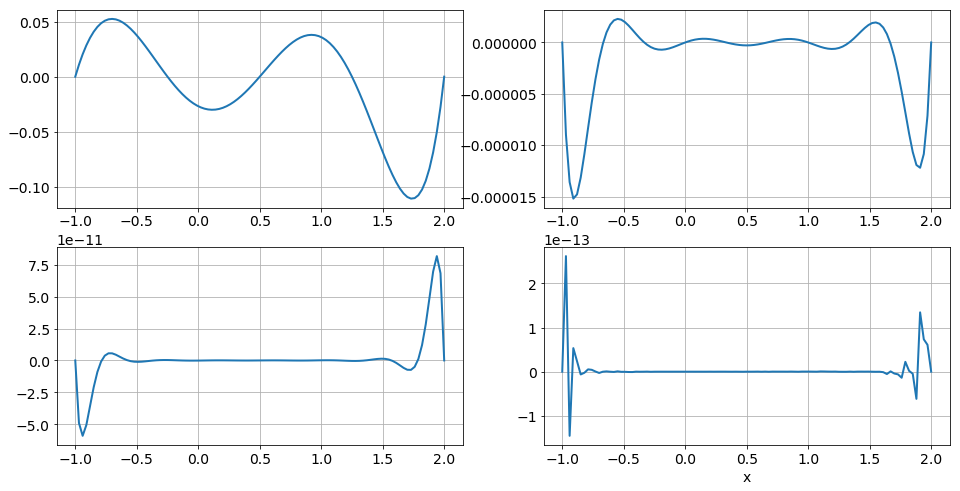

In [101]:
xdata = [equal(-1,2,5), equal(-1,2,10), equal(-1,2,15), equal(-1,2,20)]  
ydata=[yarray(x) for x in xdata]
x = linspace(-1, 2, 101)     # The x-values in which the polynomial is evaluated
card=[cardinal(data,x) for data in xdata]
f= (x**2)*cos(x)
for i in range(4):
    p=lagrange(ydata[i],card[i])
    subplot(221+i)                 # Plot the polynomial
    plot(x,(f-p))
    mn=abs(min(f-p))
    mx=abs(max(f-p))
    print("Max measured error for ",5+i*5,"points:",max(mn,mx))
xlabel('x');

Max measured error for  5 points: 0.0624636037251
Max measured error for  10 points: 2.34543853794e-06
Max measured error for  15 points: 2.58104648765e-12
Max measured error for  20 points: 1.11022302463e-15


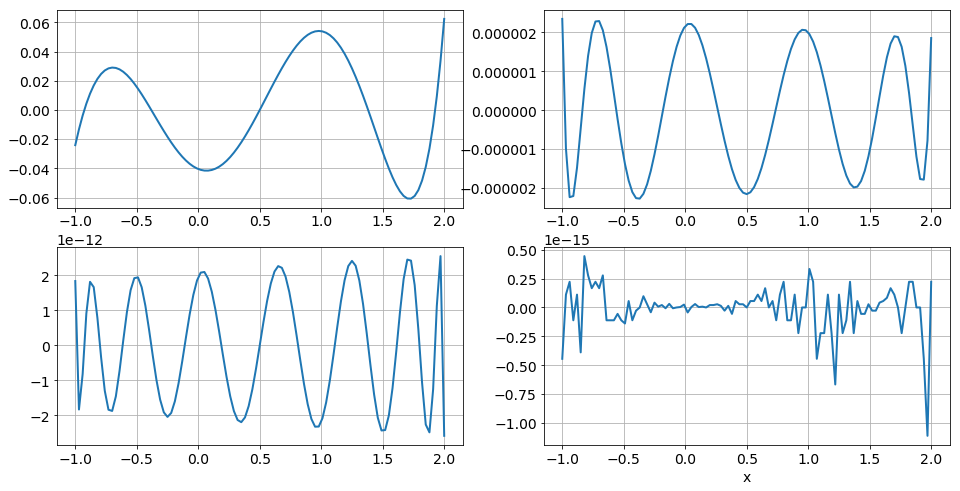

In [100]:
xdata = [chebyshev(-1,2,5), chebyshev(-1,2,10), chebyshev(-1,2,15), chebyshev(-1,2,20)]  
ydata=[yarray(x) for x in xdata]
x = linspace(-1, 2, 101)     # The x-values in which the polynomial is evaluated
card=[cardinal(data,x) for data in xdata]
f= (x**2)*cos(x)
for i in range(4):
    p=lagrange(ydata[i],card[i])
    subplot(221+i)          
    plot(x,(f-p))
    mn=abs(min(f-p))
    mx=abs(max(f-p))
    print("Max measured error for ",5+i*5,"points:",max(mn,mx))    # Plot the interpolation points 
xlabel('x');